In [93]:
import numpy as np
import pandas as pd

#plot
import matplotlib.pyplot as plt
import seaborn as sns

# dados
import kagglehub
from pathlib import Path
import zipfile


In [94]:
path = kagglehub.dataset_download("vinayakshanawad/heart-rate-prediction-to-monitor-stress-level")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1


In [95]:
p = Path(path)

train_path = p / "Train Data" / "Train Data Zip"

train_files = list(train_path.rglob("*.csv"))

train_nonL = [f for f in train_files if "non_linear" in f.name.lower()][0]
df_train_nonL = pd.read_csv(train_nonL)
train_time = [f for f in train_files if "time_domain" in f.name.lower()][0]
df_train_time = pd.read_csv(train_time)
train_freq = [f for f in train_files if "frequency_domain" in f.name.lower()][0]
df_train_freq = pd.read_csv(train_freq)
df_train_p1 = df_train_time.merge(df_train_freq, on='uuid', how='inner',validate='one_to_one')
df_train = df_train_p1.merge(df_train_nonL, on='uuid', how='inner',validate='one_to_one')


In [96]:
df = df_train.copy()

In [97]:
df.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,2,no stress
5,923.283866,617.794160,517.536544,9.965976,9.933933,51.930344,81.342254,1.200000,0.600000,-0.893858,...,6.799829,3462.418453,13.706252,0.072959,7.026695,731.873468,0.582616,1.128483,2,no stress
6,973.252908,964.650020,82.405179,10.644196,10.643638,7.741794,62.095066,2.000000,0.000000,-0.442670,...,0.307425,1243.278879,324.282351,0.003084,7.528700,116.295081,2.161461,1.158004,2,no stress
7,715.914682,679.499395,131.477151,9.477727,9.477717,13.872224,85.857703,2.533333,0.200000,5.224736,...,6.194082,1925.601664,15.144441,0.066031,6.703994,185.815874,1.110739,1.146555,2,no stress
8,814.257021,827.522830,87.014459,14.632232,14.631275,5.946766,74.588857,7.733333,0.800000,-0.455008,...,2.026982,3148.992003,48.334430,0.020689,10.349326,122.621056,2.174233,1.122471,2,interruption
9,959.694591,957.895600,54.904529,12.015400,12.015343,4.569513,62.726998,3.266667,0.200000,0.413338,...,0.490102,1705.869787,203.039304,0.004925,8.498966,77.180192,2.171600,1.176054,2,no stress


1. Verificando presença de ausêntes (ja feita no eda)

In [98]:
df.isna().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [99]:
# removendo o que não trará variância
df.drop(['datasetId', 'uuid'], axis=1,inplace=True)
df.head()


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,no stress


In [100]:
# removendo condition -> classificação e HR -> regressão
df_M = df.drop(['HR', 'condition'], axis=1)
df_M.head(5)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,11.133333,0.533333,-0.856554,0.335218,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,5.600000,0.000000,-0.408190,-0.155286,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,13.066667,0.200000,0.351789,-0.656813,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,11.800000,0.133333,-0.504947,-0.386138,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,20.200000,0.200000,-0.548408,-0.154252,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612


2. Lidando com variáveis altamente correlacionadas

In [101]:
threshold = 0.8
preditores = [i for i in df_M.columns]
removidos = []

In [102]:
corr = df_M[preditores].corr(numeric_only=True).abs()
#print(corr)

In [103]:
while True:
    np.fill_diagonal(corr.values, 0) # zera as diagonais
    trigSup = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) # trig superior

    # verificando se tem correlação maior que o limiar
    if trigSup.max().max() <= threshold:
        break

    # par mais correlacionado
    A, B = trigSup.stack().idxmax()

    # calculo da média de correlações, removendo com ele prórpio e com a outra escolhida
    mA = corr.loc[A, preditores].drop([A, B]).mean()
    mB = corr.loc[B, preditores].drop([A, B]).mean()

    # indicando remover o preditor com a maior média
    drop = A if mA >= mB else B

    # salvando a mudança
    valor_corr = corr.loc[A, B]
    removidos.append((drop, (A, B), float(valor_corr)))

    # removendo
    preditores.remove(drop)
    corr = corr.drop(index=drop, columns=drop)
    

In [104]:
print(removidos)

[('SD1', ('SDSD', 'SD1'), 1.0000000000000102), ('LF_NU', ('LF_NU', 'HF_NU'), 1.000000000000001), ('KURT', ('KURT', 'KURT_REL_RR'), 1.0), ('SKEW', ('SKEW', 'SKEW_REL_RR'), 1.0), ('RMSSD_REL_RR', ('RMSSD_REL_RR', 'SDSD_REL_RR'), 0.9999999999572793), ('RMSSD', ('RMSSD', 'SDSD'), 0.9999998264707147), ('SDRR', ('SDRR', 'SD2'), 0.9999972215849535), ('HF_NU', ('HF_NU', 'HF_LF'), 0.9961753424035372), ('VLF_PCT', ('VLF_PCT', 'LF_PCT'), 0.9952395745509537), ('MEAN_RR', ('MEAN_RR', 'MEDIAN_RR'), 0.9609491736076482), ('TP', ('VLF', 'TP'), 0.9517997470476465), ('SDSD', ('SDSD', 'pNN25'), 0.9517711780340457), ('pNN25', ('pNN25', 'LF'), 0.9157888760316598), ('SD2', ('SDRR_RMSSD', 'SD2'), 0.9154748170303951), ('SDSD_REL_RR', ('SDRR_REL_RR', 'SDSD_REL_RR'), 0.8994602585830078), ('HF_PCT', ('HF_PCT', 'HF_LF'), 0.8364211887125808)]


In [105]:
df_M

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,11.133333,0.533333,-0.856554,0.335218,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,5.600000,0.000000,-0.408190,-0.155286,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,13.066667,0.200000,0.351789,-0.656813,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,11.800000,0.133333,-0.504947,-0.386138,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,20.200000,0.200000,-0.548408,-0.154252,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,0.933333,0.000000,1.007321,0.075965,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,6.797519,50.994582,2.096850,1.314910
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,6.333333,0.200000,0.248964,0.167716,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,9.734243,105.502548,2.131264,1.175975
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,30.400000,2.066667,-0.429686,-0.075321,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,16.304530,133.797793,2.215643,1.140232
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,10.000000,1.466667,0.600389,-0.634762,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,11.838553,110.311474,2.091628,1.181937


In [106]:
for a,b,c in removidos:
    print(a)
    df_M.drop([a], axis = 1, inplace=True)

SD1
LF_NU
KURT
SKEW
RMSSD_REL_RR
RMSSD
SDRR
HF_NU
VLF_PCT
MEAN_RR
TP
SDSD
pNN25
SD2
SDSD_REL_RR
HF_PCT


In [107]:
df_M.shape

(369289, 17)

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
# padronizando e escalonando
scaler = StandardScaler(with_mean=True, with_std=True)
Z = scaler.fit_transform(df_M)
print(Z.mean(), Z.std())

3.492324066073176e-17 1.0


In [110]:
print(Z)

[[ 0.08916087  0.32399012 -0.33596454 ... -0.67275865  0.37334785
  -0.30240555]
 [ 0.80404558 -0.21855867 -0.87458304 ... -0.92307306  0.54119807
  -1.56903886]
 [ 0.49153993 -0.43049566 -0.6726011  ... -0.76971081  0.35207093
  -0.09611535]
 ...
 [ 1.38302122 -0.63414497  1.21256363 ... -0.94848808  0.73996194
  -0.67629604]
 [-0.29025121 -0.52670801  0.60661782 ... -0.24349624  0.1408559
  -0.00571249]
 [-0.20244055 -0.8006104  -0.33596454 ... -0.26188235  0.70397363
   0.83281311]]


In [111]:
Cov = pd.DataFrame(Z, columns=df_M.columns).cov()
print(Cov)

                   MEDIAN_RR  SDRR_RMSSD     pNN50  MEAN_REL_RR  \
MEDIAN_RR           1.000003    0.203816  0.196993    -0.018019   
SDRR_RMSSD          0.203816    1.000003  0.187629     0.014104   
pNN50               0.196993    0.187629  1.000003    -0.039165   
MEAN_REL_RR        -0.018019    0.014104 -0.039165     1.000003   
MEDIAN_REL_RR      -0.006349    0.300670 -0.190604     0.134923   
SDRR_REL_RR        -0.157427   -0.048227  0.756255    -0.013210   
SDRR_RMSSD_REL_RR   0.635820    0.078020  0.012339    -0.035138   
KURT_REL_RR        -0.284508   -0.029829 -0.064264     0.045365   
SKEW_REL_RR        -0.317131    0.313449  0.088570     0.010727   
VLF                 0.399024    0.617611  0.529804    -0.026638   
LF                  0.084147   -0.276739  0.670074    -0.022014   
LF_PCT             -0.262427   -0.637904  0.003415    -0.003950   
HF                 -0.550245   -0.062388  0.412258     0.018999   
LF_HF               0.421339   -0.040054  0.065119     0.00150

In [112]:
vals, vecs = np.linalg.eigh(Cov)              # C é simétrica → eigh
order = np.argsort(vals)[::-1]              # ordem decrescente
vals = vals[order]
vecs = vecs[:, order]

In [113]:
print(vals, vecs, sep="\n\n")

[4.35652985 3.49857393 3.02080916 1.28020933 1.02739982 0.88269175
 0.69445858 0.62536263 0.44985962 0.39669098 0.21247345 0.16467626
 0.13486537 0.1094762  0.06178017 0.05481943 0.02936949]

[[-3.41981243e-01 -2.00612914e-01  1.35828111e-01  1.12277596e-01
  -5.58208806e-02  1.33470207e-01  1.60470620e-01  4.17663271e-01
  -3.20805286e-01 -1.38639363e-01 -5.42589941e-01  9.60987481e-02
  -1.92481480e-01  1.51542201e-01 -3.20963745e-01 -1.47542436e-02
  -3.99846236e-02]
 [-2.14513835e-01  3.37383871e-01  1.99940659e-01  1.15718691e-01
   9.71636272e-02 -1.93460017e-01  4.89395420e-01  3.35296481e-02
   1.47777807e-01 -1.87918971e-02 -8.14658315e-02 -3.44029911e-02
  -4.17792830e-01 -8.86519453e-02  5.26626592e-01  9.73991540e-02
  -6.73420828e-03]
 [ 5.35832667e-02 -2.63880581e-02  5.25232487e-01  6.51899314e-02
  -3.86655399e-02  2.29941832e-02 -1.46533328e-01  2.05101626e-01
  -1.92403554e-02 -1.51690694e-01 -1.18055845e-02 -7.05492704e-01
   2.21995653e-01 -1.32197822e-01  1.0744296

In [114]:
(vals[0]+vals[1])/vals.sum() * 100

np.float64(46.20636773715332)

scree plot

[0.25626577 0.20579791 0.17769418 0.07530623 0.06043512 0.0519229
 0.04085039 0.03678594 0.02646226 0.0233347  0.0124984  0.00968681
 0.00793324 0.00643976 0.00363412 0.00322466 0.00172761]


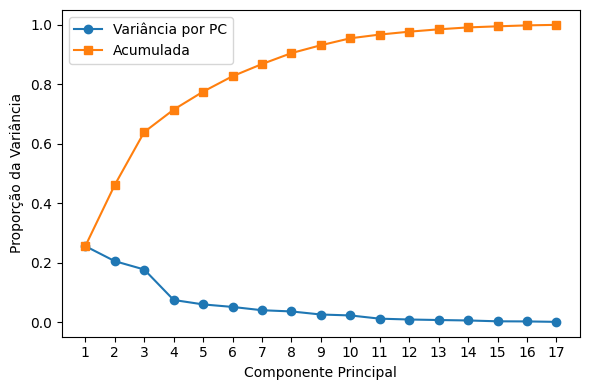

In [115]:
var = vals / vals.sum()
print(var)
var_cum = np.cumsum(var)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(var)+1), var, marker='o', label='Variância por PC')
plt.plot(range(1, len(var)+1), var_cum, marker='s', label='Acumulada')
plt.xlabel('Componente Principal'); plt.ylabel('Proporção da Variância')
plt.xticks(range(1, len(var)+1))
plt.legend(); plt.tight_layout(); plt.show()

biplot

In [116]:
Z_pca = Z @ vecs[:, :2]
pca_df = pd.DataFrame(Z_pca, columns=['PC1', 'PC2'])
#pca_df['condition'] = df['condition'].values

In [117]:
import mpl_axes_aligner
import matplotlib.patheffects as pe

In [118]:
#Fonte: https://insidelearningmachines.com/biplot/#:~:text=We%20can%20make%20a%20biplot%20in%20Python%20that,%23set%20x-axis%20label%20ax.set_xlabel%28%22PC1%22%2Cfontsize%3D10%29%20%23set%20y-axis%20label%20

def biplot(dfScores, dfLoadings, y, k_loadings=8):
    # --- Cores fixas das classes
    palette = {'no stress': '#1f77b4', 'interruption': '#ff7f0e', 'time pressure': '#2ca02c'}
    markers = {'no stress': 'o', 'interruption': 's', 'time pressure': '^'}

    fig, ax = plt.subplots(figsize=(12, 7))

    # --- Pontos (scores)
    y = pd.Series(y).astype(str).values
    for c in pd.unique(y):
        m = (y == c)
        ax.scatter(dfScores.loc[m, 'PC1'], dfScores.loc[m, 'PC2'],
                   s=8, alpha=0.55, c=[palette.get(c, 'grey')], marker=markers.get(c, 'o'),
                   label=c)

    ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
    ax.legend(title='Condition', frameon=False, loc='upper left', bbox_to_anchor=(1.02, 1.02))
    ax.grid(alpha=0.15)

    # --- Seleção dos loadings mais fortes
    L = dfLoadings.loc[['PC1','PC2']].copy()
    strength = np.sqrt(L.loc['PC1']**2 + L.loc['PC2']**2)
    cols = strength.sort_values(ascending=False).head(k_loadings).index

    # --- Escala dos vetores para caber no painel
    # raio ~ 0.9 do alcance dos scores
    xspan = np.ptp(dfScores['PC1']); yspan = np.ptp(dfScores['PC2'])
    radius = 0.9 * min(xspan, yspan) / 2
    scale = radius / strength[cols].max()

    # --- Eixos para setas
    ax2 = ax.twinx().twiny()

    for col in cols:
        x = L.loc['PC1', col] * scale
        yv = L.loc['PC2', col] * scale
        ax2.arrow(0, 0, x, yv,
                  color='#555', lw=1.5, alpha=0.8, length_includes_head=True,
                  head_width=0.06*radius*0.1, head_length=0.09*radius*0.1, zorder=3)
        ax2.text(x*1.06, yv*1.06, col,
                 fontsize=9, color='black', ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.6),
                 zorder=4)

    # alinhar eixos
    mpl_axes_aligner.align.xaxes(ax, 0, ax2, 0, 0.5)
    mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.5)

    plt.tight_layout()
    plt.show()



In [119]:
dfScores   = pd.DataFrame(Z_pca,columns=['PC'+str(i) for i in range(1,3)])
dfLoadings = pd.DataFrame(vecs[:, :2].T, columns=df_M.columns, index=dfScores.columns) 

In [120]:
dfLoadings

,MEDIAN_RR,SDRR_RMSSD,pNN50,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,LF,LF_PCT,HF,LF_HF,HF_LF,sampen,higuci
PC1,-0.341981,-0.214514,0.053583,0.006114,-0.175052,0.256805,-0.376571,0.080002,0.027848,-0.240627,0.156919,0.300428,0.367278,-0.180236,0.313844,0.012425,0.386960
PC2,-0.200613,0.337384,-0.026388,0.042685,0.292116,-0.057727,-0.203193,0.244671,0.314711,0.189019,-0.295902,-0.345848,0.137006,-0.148597,0.298863,-0.425896,-0.009724


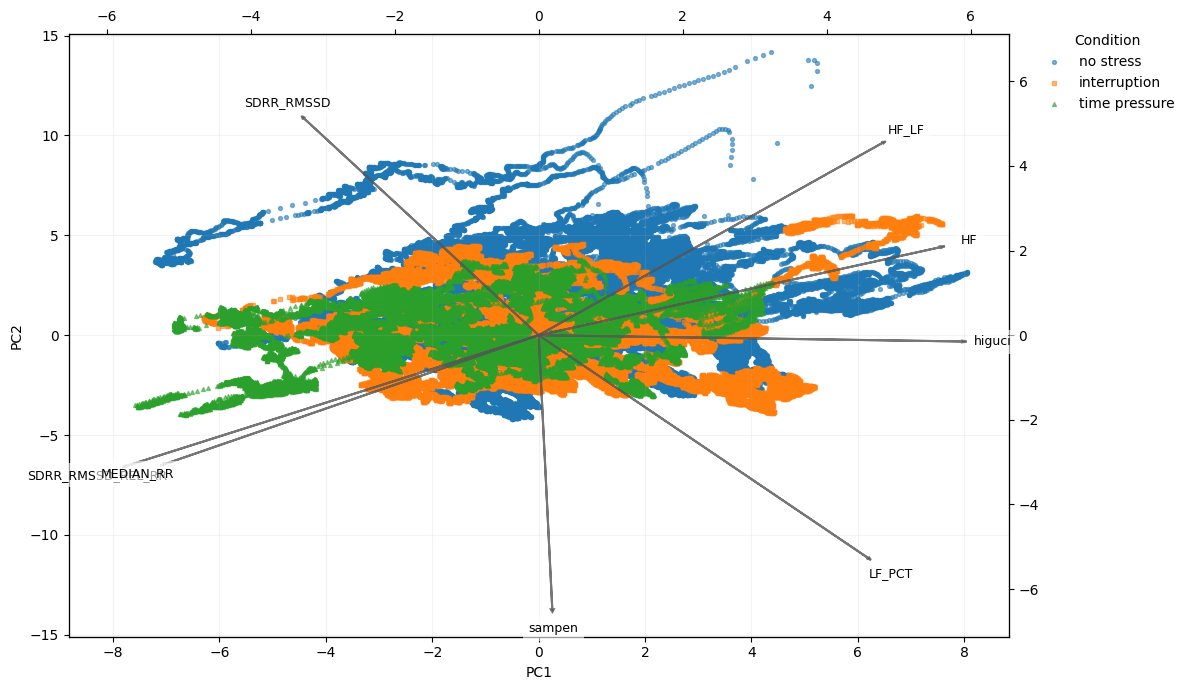

In [121]:
biplot(dfScores, dfLoadings, y = df['condition'],)

# com preditores escolhidos:

In [122]:
variaveis = [
    "MEDIAN_RR",
    "pNN50",
    "MEDIAN_REL_RR",
    "SKEW_REL_RR",
    "LF_PCT",
    "HF_LF",
    "LF",
    "SDRR_REL_RR",
    "SDRR_RMSSD_REL_RR",
    "VLF",
]


In [123]:
df_M2 = df.copy()
for i in df.columns:
    if i not in variaveis:
        df_M2.drop([i], axis=1, inplace=True)


In [124]:
df_M2.shape

(369289, 10)

In [125]:
# padronizando e escalonando
scaler = StandardScaler(with_mean=True, with_std=True)
Z2 = scaler.fit_transform(df_M2)

[0.30230696 0.26860481 0.21080542 0.08875808 0.05000243 0.02826248
 0.02153075 0.01513925 0.01051223 0.00407759]


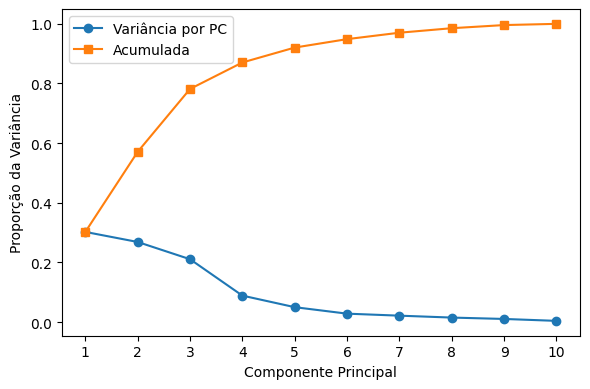

In [126]:
Cov = pd.DataFrame(Z2, columns=df_M2.columns).cov()
vals, vecs = np.linalg.eigh(Cov)              # C é simétrica → eigh
order = np.argsort(vals)[::-1]              # ordem decrescente
vals = vals[order]
vecs = vecs[:, order]


var = vals / vals.sum()
print(var)
var_cum = np.cumsum(var)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(var)+1), var, marker='o', label='Variância por PC')
plt.plot(range(1, len(var)+1), var_cum, marker='s', label='Acumulada')
plt.xlabel('Componente Principal'); plt.ylabel('Proporção da Variância')
plt.xticks(range(1, len(var)+1))
plt.legend(); plt.tight_layout(); plt.show()

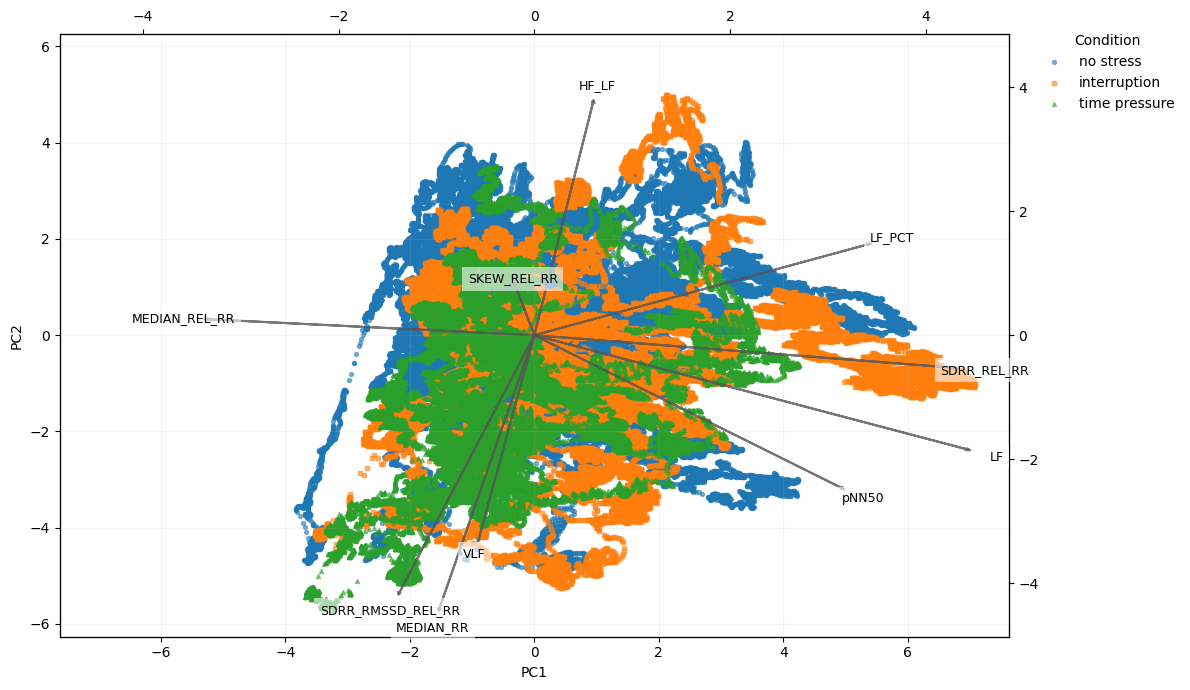

In [127]:
Z2_pca = Z2 @ vecs[:, :2]
pca_df = pd.DataFrame(Z2_pca, columns=['PC1', 'PC2'])
#pca_df['condition'] = df['condition'].values
dfScores   = pd.DataFrame(Z2_pca,columns=['PC'+str(i) for i in range(1,3)])
dfLoadings = pd.DataFrame(vecs[:, :2].T, columns=df_M2.columns, index=dfScores.columns) 
biplot(dfScores, dfLoadings, y = df['condition'], k_loadings=10)

                   MEDIAN_RR     pNN50  MEDIAN_REL_RR  SDRR_REL_RR  \
MEDIAN_RR           1.000000  0.196992      -0.006349    -0.157426   
pNN50               0.196992  1.000000      -0.190604     0.756253   
MEDIAN_REL_RR      -0.006349 -0.190604       1.000000    -0.365886   
SDRR_REL_RR        -0.157426  0.756253      -0.365886     1.000000   
SDRR_RMSSD_REL_RR   0.635819  0.012339       0.024994    -0.266828   
SKEW_REL_RR        -0.317130  0.088570       0.089557     0.067495   
VLF                 0.399023  0.529802       0.237918     0.242427   
LF                  0.084147  0.670072      -0.550557     0.783464   
LF_PCT             -0.262426  0.003415      -0.602589     0.327483   
HF_LF              -0.602190  0.030559       0.114673     0.257943   

                   SDRR_RMSSD_REL_RR  SKEW_REL_RR       VLF        LF  \
MEDIAN_RR                   0.635819    -0.317130  0.399023  0.084147   
pNN50                       0.012339     0.088570  0.529802  0.670072   
MEDIAN_REL

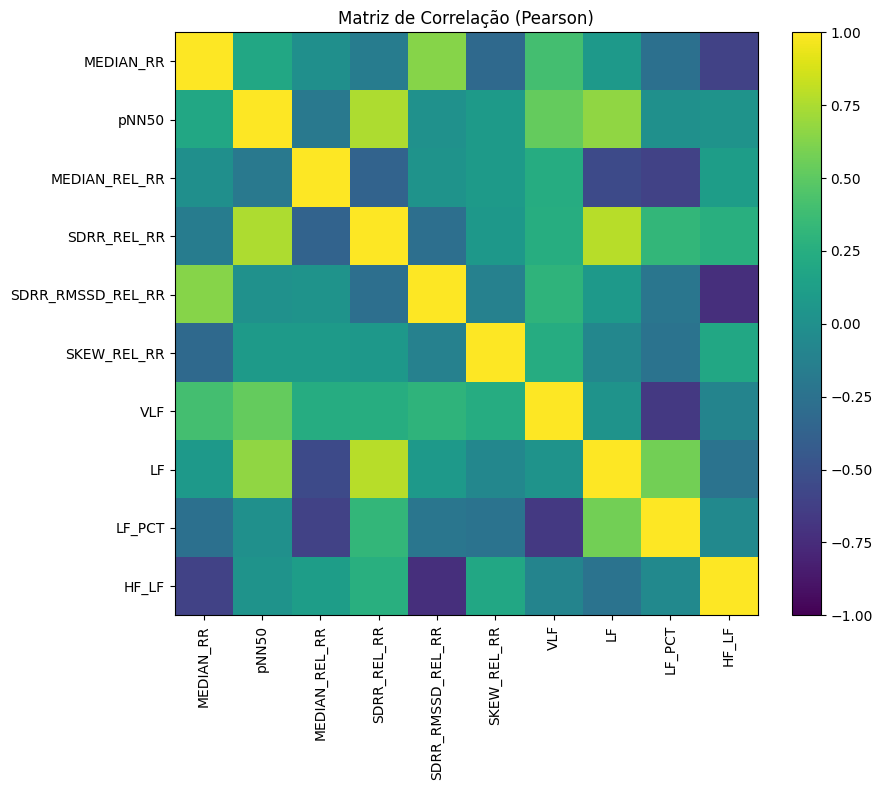

In [128]:
num_cols = df_M2.select_dtypes(include='number').columns
corr = df_M2[num_cols].corr()
print(corr)

plt.figure(figsize=(10,8))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Matriz de Correlação (Pearson)')
plt.tight_layout(); 
plt.show()